In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt

In [69]:
from sklearn.metrics import precision_score, recall_score, f1_score

In [ ]:
from sklearn.preprocessing import OrdinalEncoder

In [43]:
X_train = pd.read_csv('./X_train.csv')
y_train = pd.read_csv('./y_train.csv')
X_test = pd.read_csv('./X_test.csv')
y_test = pd.read_csv('./y_test.csv')

In [44]:
%store -r X_train_SMOTE
%store -r y_train_SMOTE

In [45]:
X_train = pd.DataFrame(X_train.iloc[:, :-1], columns=X_train.columns[:-1])
X_test = pd.DataFrame(X_test.iloc[:, :-1], columns=X_test.columns[:-1])
#y_train = y_train['Tip']
#y_test = y_test['Tip']
y_train_SMOTE = pd.DataFrame(y_train_SMOTE, columns=['Tip'])
X_train_SMOTE = pd.DataFrame(X_train_SMOTE.iloc[:, :-1], columns=X_train_SMOTE.columns[:-1])

In [46]:
oe = OrdinalEncoder()

In [47]:
oe.fit(y_train)

OrdinalEncoder()

In [48]:
y_train = pd.DataFrame(oe.transform(y_train), columns=y_train.columns)['Tip']

In [49]:
y_test = pd.DataFrame(oe.transform(y_test), columns=y_test.columns)['Tip']

In [50]:
oe.fit(y_train_SMOTE)

OrdinalEncoder()

In [51]:
y_train_SMOTE = pd.DataFrame(oe.transform(y_train_SMOTE), columns=y_train_SMOTE.columns)['Tip']

In [71]:
param_grid = {
    'n_neighbors':[i for i in range(1, 10)],
    'weights' : ['uniform', 'distance'],
    'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute']
}

clf = KNeighborsClassifier()

grid_search = GridSearchCV(clf, param_grid, cv=5, verbose=4)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_

best_clf = KNeighborsClassifier(**best_params)
best_clf.fit(X_train, y_train)

y_pred_best = best_clf.predict(X_test)
accuracy_best = accuracy_score(y_test, y_pred_best)
precision_best = precision_score(y_test, y_pred_best, average='weighted')
recall_best = recall_score(y_test, y_pred_best, average='weighted')
f1_best = f1_score(y_test, y_pred_best, average='weighted')

classification_rep = classification_report(y_test, y_pred_best)

print("\nNajbolji parametri:", best_params)
print("Tacnost modela sa najboljim parametrima:", round(accuracy_best, 5))
print("Precision modela sa najboljim parametrima:", round(precision_best, 5))
print("Recall modela sa najboljim parametrima:", round(recall_best, 5))
print("F1 score modela sa najboljim parametrima:", round(f1_best, 5))
print("\nIzvestaj o klasifikaciji:\n", classification_rep)

Fitting 5 folds for each of 72 candidates, totalling 360 fits
[CV 1/5] END algorithm=auto, n_neighbors=1, weights=uniform;, score=0.746 total time=   0.0s
[CV 2/5] END algorithm=auto, n_neighbors=1, weights=uniform;, score=0.762 total time=   0.0s
[CV 3/5] END algorithm=auto, n_neighbors=1, weights=uniform;, score=0.868 total time=   0.0s
[CV 4/5] END algorithm=auto, n_neighbors=1, weights=uniform;, score=0.851 total time=   0.0s
[CV 5/5] END algorithm=auto, n_neighbors=1, weights=uniform;, score=0.810 total time=   0.0s
[CV 1/5] END algorithm=auto, n_neighbors=1, weights=distance;, score=0.746 total time=   0.0s
[CV 2/5] END algorithm=auto, n_neighbors=1, weights=distance;, score=0.762 total time=   0.0s
[CV 3/5] END algorithm=auto, n_neighbors=1, weights=distance;, score=0.868 total time=   0.0s
[CV 4/5] END algorithm=auto, n_neighbors=1, weights=distance;, score=0.851 total time=   0.0s
[CV 5/5] END algorithm=auto, n_neighbors=1, weights=distance;, score=0.810 total time=   0.0s
[CV

In [53]:
param_grid = {
    'n_neighbors':[i for i in range(1, 10)],
    'weights' : ['uniform', 'distance'],
    'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute']
}

clf = KNeighborsClassifier()

grid_search = GridSearchCV(clf, param_grid, cv=5, verbose=4)
grid_search.fit(X_train_SMOTE, y_train_SMOTE)

best_params = grid_search.best_params_

best_clf = KNeighborsClassifier(**best_params)
best_clf.fit(X_train_SMOTE, y_train_SMOTE)

y_pred_best = best_clf.predict(X_test)
accuracy_best = accuracy_score(y_test, y_pred_best)

classification_rep = classification_report(y_test, y_pred_best)

print("\nNajbolji parametri:", best_params)
print("Preciznost modela sa najboljim parametrima:", round(accuracy_best, 5))
print("\nIzvestaj o klasifikaciji:\n", classification_rep)

Fitting 5 folds for each of 72 candidates, totalling 360 fits
[CV 1/5] END algorithm=auto, n_neighbors=1, weights=uniform;, score=0.905 total time=   0.0s
[CV 2/5] END algorithm=auto, n_neighbors=1, weights=uniform;, score=0.905 total time=   0.0s
[CV 3/5] END algorithm=auto, n_neighbors=1, weights=uniform;, score=0.929 total time=   0.0s
[CV 4/5] END algorithm=auto, n_neighbors=1, weights=uniform;, score=0.953 total time=   0.0s
[CV 5/5] END algorithm=auto, n_neighbors=1, weights=uniform;, score=0.947 total time=   0.0s
[CV 1/5] END algorithm=auto, n_neighbors=1, weights=distance;, score=0.905 total time=   0.0s
[CV 2/5] END algorithm=auto, n_neighbors=1, weights=distance;, score=0.905 total time=   0.0s
[CV 3/5] END algorithm=auto, n_neighbors=1, weights=distance;, score=0.929 total time=   0.0s
[CV 4/5] END algorithm=auto, n_neighbors=1, weights=distance;, score=0.953 total time=   0.0s
[CV 5/5] END algorithm=auto, n_neighbors=1, weights=distance;, score=0.947 total time=   0.0s
[CV

In [54]:
from sklearn.decomposition import PCA

In [55]:
import numpy as np

In [56]:
from matplotlib.colors import ListedColormap

In [57]:
pca_standardized = PCA(n_components=64)

In [58]:
pca_standardized.fit(X_train)

PCA(n_components=64)

In [59]:
pca_standardized.explained_variance_ratio_

array([4.38397343e-01, 3.06546563e-01, 9.03091448e-02, 4.92543751e-02,
       3.18004213e-02, 1.34891341e-02, 8.31729779e-03, 7.91185393e-03,
       6.94175772e-03, 5.44493116e-03, 5.24007426e-03, 4.10258244e-03,
       3.28814499e-03, 2.90823689e-03, 2.20321225e-03, 1.93076622e-03,
       1.78874402e-03, 1.61355396e-03, 1.53132328e-03, 1.36086536e-03,
       1.21504985e-03, 1.16670762e-03, 1.09147926e-03, 9.75951430e-04,
       9.01176483e-04, 8.34880399e-04, 7.95898004e-04, 7.17704207e-04,
       6.88287094e-04, 6.62536764e-04, 5.94373766e-04, 5.34708443e-04,
       5.18722947e-04, 4.78191694e-04, 4.54703884e-04, 4.27864131e-04,
       3.79771807e-04, 3.65951547e-04, 3.61647832e-04, 3.37260237e-04,
       3.30778937e-04, 2.99115542e-04, 2.81743959e-04, 2.60723480e-04,
       2.38038816e-04, 2.14662613e-04, 1.72349469e-04, 1.70207781e-04,
       1.48733673e-04, 9.79348428e-08, 9.39099963e-08, 6.64008457e-08,
       5.01895860e-08, 3.82226831e-08, 2.73364939e-08, 2.55282558e-08,
      

In [60]:
coveredVariance = 0
optimalNumOfComponents = 48

x1 = []
y1 = []
x2 = []
y2 = []

for numOfComponents in range(1, 49):
    coveredVarianceByComponent = pca_standardized.explained_variance_ratio_[numOfComponents-1] * 100
    coveredVariance += coveredVarianceByComponent
    x1.append(f'pca{numOfComponents-1}')
    x2.append(f'{numOfComponents}')
    y1.append(coveredVarianceByComponent)
    y2.append(coveredVariance)
    print(coveredVariance, '        ', coveredVarianceByComponent)
    if coveredVariance > 99:
        optimalNumOfComponents = numOfComponents
        break
        
x1 = np.array(x1)
x2 = np.array(x2)
y1 = np.array(y1)
y2 = np.array(y2)  

43.839734323979116          43.839734323979116
74.49439061836594          30.654656294386832
83.52530509595518          9.03091447758923
88.45074260288207          4.925437506926898
91.63078473457085          3.180042131688772
92.97969814572642          1.3489134111555698
93.81142792483405          0.8317297791076378
94.60261331793325          0.7911853930992027
95.29678908949559          0.6941757715623429
95.84128220561786          0.5444931161222679
96.36528963202538          0.5240074264075247
96.77554787627464          0.4102582442492621
97.10436237568497          0.3288144994103305
97.39518606508783          0.2908236894028631
97.61550729019811          0.22032122511028185
97.80858391248304          0.19307662228493927
97.98745831468982          0.17887440220677964
98.14881371095048          0.16135539626066375
98.30194603894722          0.15313232799673876
98.43803257451727          0.13608653557004824
98.55953755990575          0.12150498538848584
98.67620832209141          0.1

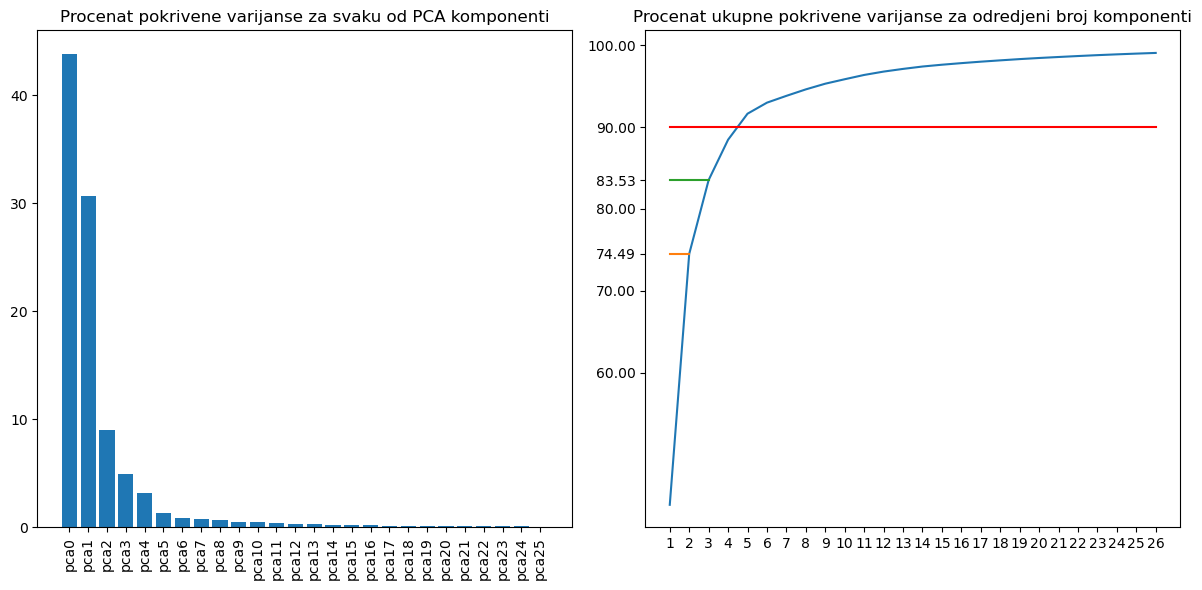

In [61]:
fig = plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.bar(x1, y1)

plt.rcParams["figure.figsize"] = (12,6)
plt.xticks(rotation=90)

plt.title('Procenat pokrivene varijanse za svaku od PCA komponenti')


plt.subplot(1, 2, 2)
plt.plot(x2, y2)
plt.plot(x2, np.array([90 for i in range(len(y2))]), color='red')

plt.plot(np.array([0, 1]), [(y2[1]) for i in range(2)])
plt.plot(np.array([0, 1, 2]), [(y2[2]) for i in range(3)])

plt.yticks(list([60, 70, 80, 90, 100, y2[1], y2[2]]))

plt.title('Procenat ukupne pokrivene varijanse za odredjeni broj komponenti')

plt.tight_layout()
plt.show()

In [62]:
pca3 = PCA(n_components=3)

In [63]:
pca3.fit(X_train)

PCA(n_components=3)

In [64]:
X_PCA3 = pd.DataFrame(pca3.transform(X_train))

In [65]:
error_categories = pd.Categorical(y_train)

In [66]:
color_list = ['red', 'blue', 'green', 'yellow', 'pink', 'purple', 'orange', 'brown', 'gray', 'magenta', 'cyan']

In [67]:
X_PCA2 = X_PCA3.iloc[:, :2]
#X_PCA2

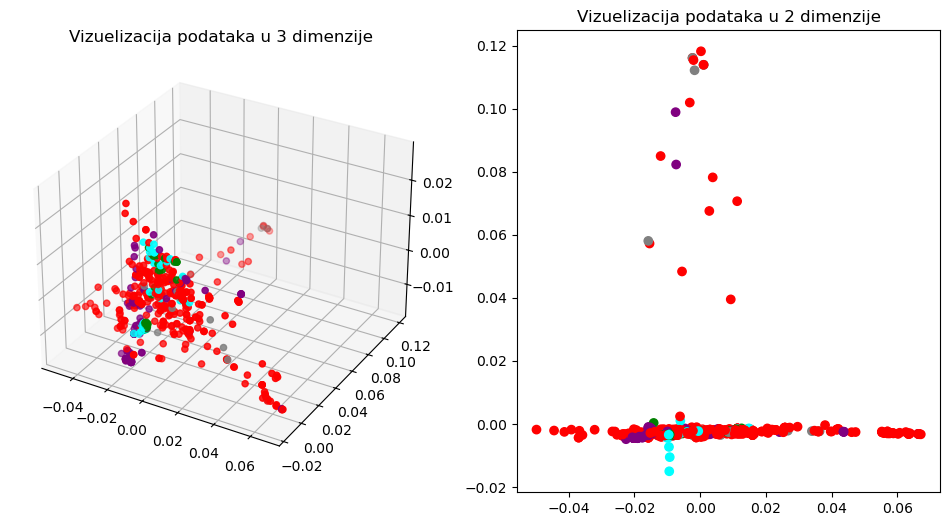

In [68]:
fig = plt.figure()
ax = plt.subplot(1, 2, 1, projection ='3d')
ax.scatter(X_PCA3[0], X_PCA3[1], X_PCA3[2], c = y_train, cmap=ListedColormap(color_list))
plt.title('Vizuelizacija podataka u 3 dimenzije')

plt.subplot(1, 2, 2)
plt.scatter(X_PCA2[0], X_PCA2[1], c = y_train, cmap=ListedColormap(color_list))
plt.title('Vizuelizacija podataka u 2 dimenzije')
plt.show()